# Análise Estátistica de Dados

## Bibliotecas
Como este é um projeto de teste inicial no GitHub, o objetivo é fazer uma análise do conjunto de dados e das características, portanto, apenas as bibliotecas necessárias serão implementadas.

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Processamento básico de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

## Conjunto de dados
Este conjunto de dados contém informações sobre salários com base em experiência, idade, gênero, nível de educação e título do trabalho.

### Colunas:

1. **Age**: Idade do indivíduo.
2. **Gender**: Gênero do indivíduo.
3. **Education Level**: Nível de educação.
4. **Job Title**: Título do trabalho.
5. **Years of Experience**: Anos de experiência no campo.
6. **Salary**: Salário correspondente.

Para mais detalhes, você pode acessar o [conjunto de dados original](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data).

In [3]:
# Lendo o arquivo CSV
df = pd.read_csv("Salary Data.csv")

# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

# Exibindo o DataFrame
df.head()


O dataset possui 6704 registros e 6 atributos.


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
#Vendo as colunas
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
#Obtendo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


## Tratamento dos dados

### Substituição do nível de Educação

In [6]:
df['Education Level'].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [7]:
df.replace("Master's","Master's Degree",inplace=True)
df.replace("Bachelor's","Bachelor's Degree",inplace=True)
df.replace('phD','PhD',inplace=True)
df['Education Level'].value_counts()

Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64

###Verificando Duplicadas

In [8]:
#Verificando duplicatas
df.duplicated().sum()

4913

In [9]:
#Verificando se a duplicadas
df.duplicated().sum()

4913

Identifiquei que há 4912 entradas duplicadas. 
Em seguida, utilizei pivot_table() para verificar o número de entradas duplicadas.

In [10]:
#Mostrando as duplicadas 
df_duplicado = df.pivot_table(index=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary'], aggfunc='size').sort_values(ascending=False).reset_index(name='Vezes').head(15)
df_duplicado

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Vezes
0,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0,45
1,24.0,Female,High School,Receptionist,0.0,25000.0,45
2,32.0,Male,Bachelor's Degree,Product Manager,7.0,120000.0,45
3,32.0,Male,Bachelor's Degree,Software Engineer,8.0,190000.0,39
4,33.0,Female,Master's Degree,Product Manager,11.0,198000.0,38
5,29.0,Female,Master's Degree,Data Scientist,6.0,180000.0,37
6,27.0,Male,Bachelor's Degree,Software Engineer,4.0,140000.0,37
7,25.0,Male,Bachelor's Degree,Product Manager,1.0,60000.0,36
8,26.0,Male,Bachelor's Degree,Data Analyst,3.0,130000.0,35
9,31.0,Female,PhD,Data Scientist,8.0,140000.0,33


A pergunta é: é razoável ter 45 pessoas com exatamente os mesmos dados em uma pesquisa com 6700 pessoas?
Talvez. No final, decidi mantê-las, pois não queria perder 70% das entradas.

###Verificando nulos e eleminado-os

In [11]:
#Verificando se a nulos
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [12]:
round((df.isnull().sum()/df.shape[0])*100,3)

Age                    0.030
Gender                 0.030
Education Level        0.045
Job Title              0.030
Years of Experience    0.045
Salary                 0.075
dtype: float64

A coluna que tem mais nulos, Salary, tem apenas 0,075% de linhas com valores nulos. Vamos ver os registros  com valores nulos em Salary.

In [13]:
df[df["Salary"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [14]:
# Como há poucos nulos, é possível usar o método de eliminação de linhas 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


Verificando se os salarios tem valores nas casas decimais 

In [15]:
df['Salary']

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [16]:
#Transformando os numerais em inteiros
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].astype(int)

#Verificando se a conversão foi realizada
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6698 non-null   int32 
 1   Gender               6698 non-null   object
 2   Education Level      6698 non-null   object
 3   Job Title            6698 non-null   object
 4   Years of Experience  6698 non-null   int32 
 5   Salary               6698 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 287.8+ KB


###Dataframe tratado

In [17]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's Degree,Software Engineer,5,90000
1,28,Female,Master's Degree,Data Analyst,3,65000
2,45,Male,PhD,Senior Manager,15,150000
3,36,Female,Bachelor's Degree,Sales Associate,7,60000
4,52,Male,Master's Degree,Director,20,200000
...,...,...,...,...,...,...
6699,49,Female,PhD,Director of Marketing,20,200000
6700,32,Male,High School,Sales Associate,3,50000
6701,30,Female,Bachelor's Degree,Financial Manager,4,55000
6702,46,Male,Master's Degree,Marketing Manager,14,140000


In [18]:
# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

O dataset possui 6698 registros e 6 atributos.


In [19]:
#Extraindo estatiticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6698.0,33.623022,7.615784,21.0,28.0,32.0,38.0,62.0
Years of Experience,6698.0,8.094207,6.061399,0.0,3.0,7.0,12.0,34.0
Salary,6698.0,115329.253061,52789.792507,350.0,70000.0,115000.0,160000.0,250000.0


In [20]:
#Verificando valores únicos por coluna
df.nunique()

Age                     41
Gender                   3
Education Level          4
Job Title              191
Years of Experience     35
Salary                 444
dtype: int64

In [21]:
# a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.
df_describe = df.describe()

# A amplitude é a diferença entre o valor máximo e mínimo. 
df_describe.loc['amp'] = df_describe.loc['max'] - df_describe.loc['min'] 

# O coeficiente de variação (CV) é uma medida da variabilidade relativa em relação à média.
df_describe.loc['cv'] = (df_describe.loc['std'] / df_describe.loc['mean'] ).abs() *100

# A assimetria é uma medida estatística para avaliar a assimetria na distribuição dos dados.
df_describe.loc['skewness'] = df.skew()

# Calculando o IQR para cada coluna numérica
df_describe.loc['IQR'] = df_describe.loc['75%'] - df_describe.loc['25%']

# Por fim, o código arredonda os valores para duas casas decimais e transpõe o DataFrame para melhor visualização.
df_describe.round(2).T

,count,mean,std,min,25%,50%,75%,max,amp,cv,skewness,IQR
Age,6698.0,33.62,7.62,21.0,28.0,32.0,38.0,62.0,41.0,22.65,0.91,10.0
Years of Experience,6698.0,8.09,6.06,0.0,3.0,7.0,12.0,34.0,34.0,74.89,0.98,9.0
Salary,6698.0,115329.25,52789.79,350.0,70000.0,115000.0,160000.0,250000.0,249650.0,45.77,0.06,90000.0


###Verificando apenas as colunas numéricas

In [22]:
# Selecionando apenas as colunas numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Percorrendo cada coluna numérica do DataFrame e vendo o TOP 10 valores 
for col in numeric_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:10])
    print('\n')

Coluna: Age
27    516
30    449
29    444
28    429
33    398
26    393
31    364
32    351
34    309
25    284
Name: Age, dtype: int64


Coluna: Years of Experience
2     610
3     602
1     552
4     522
6     438
8     425
5     399
9     380
7     352
11    320
Name: Years of Experience, dtype: int64


Coluna: Salary
140000    287
120000    282
160000    276
55000     251
60000     231
170000    231
190000    225
130000    220
80000     214
185000    200
Name: Salary, dtype: int64




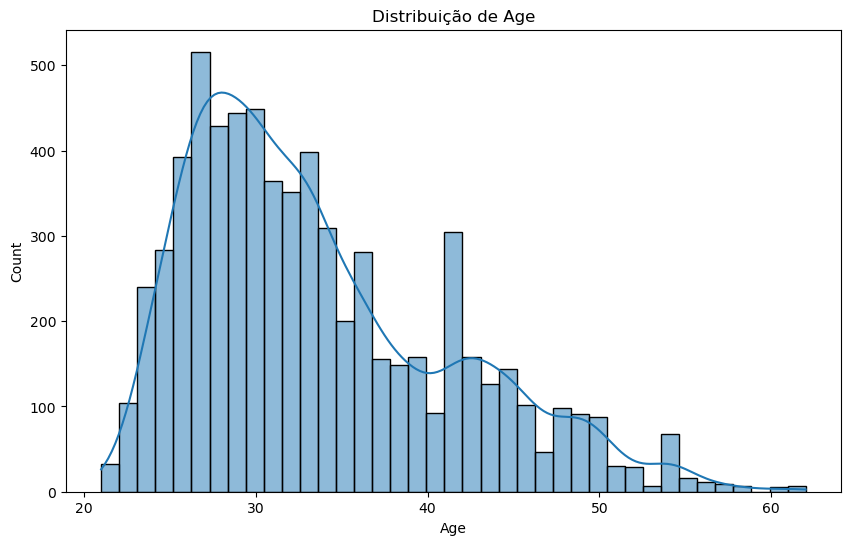

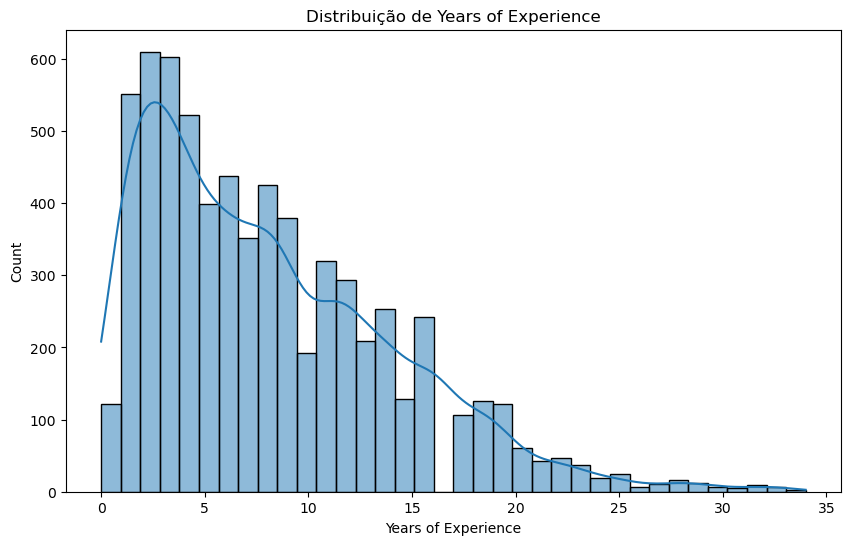

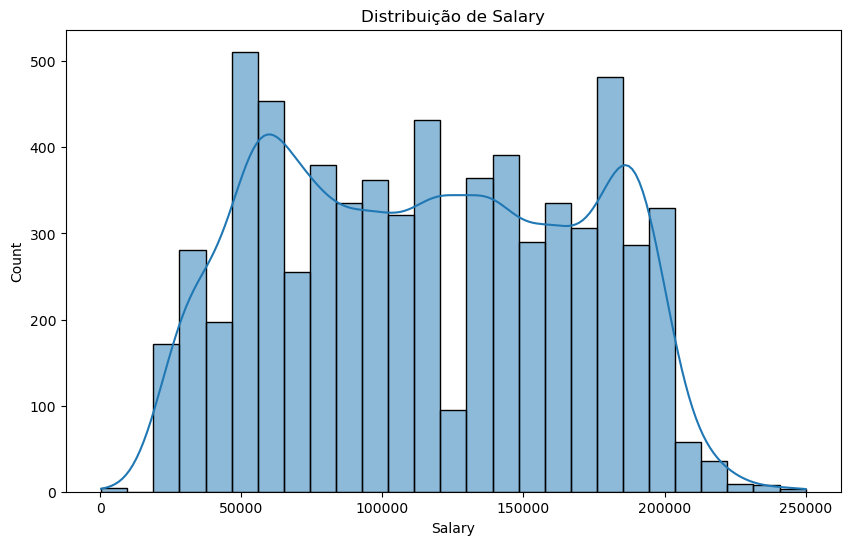

In [23]:
for col in numeric_columns:
    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

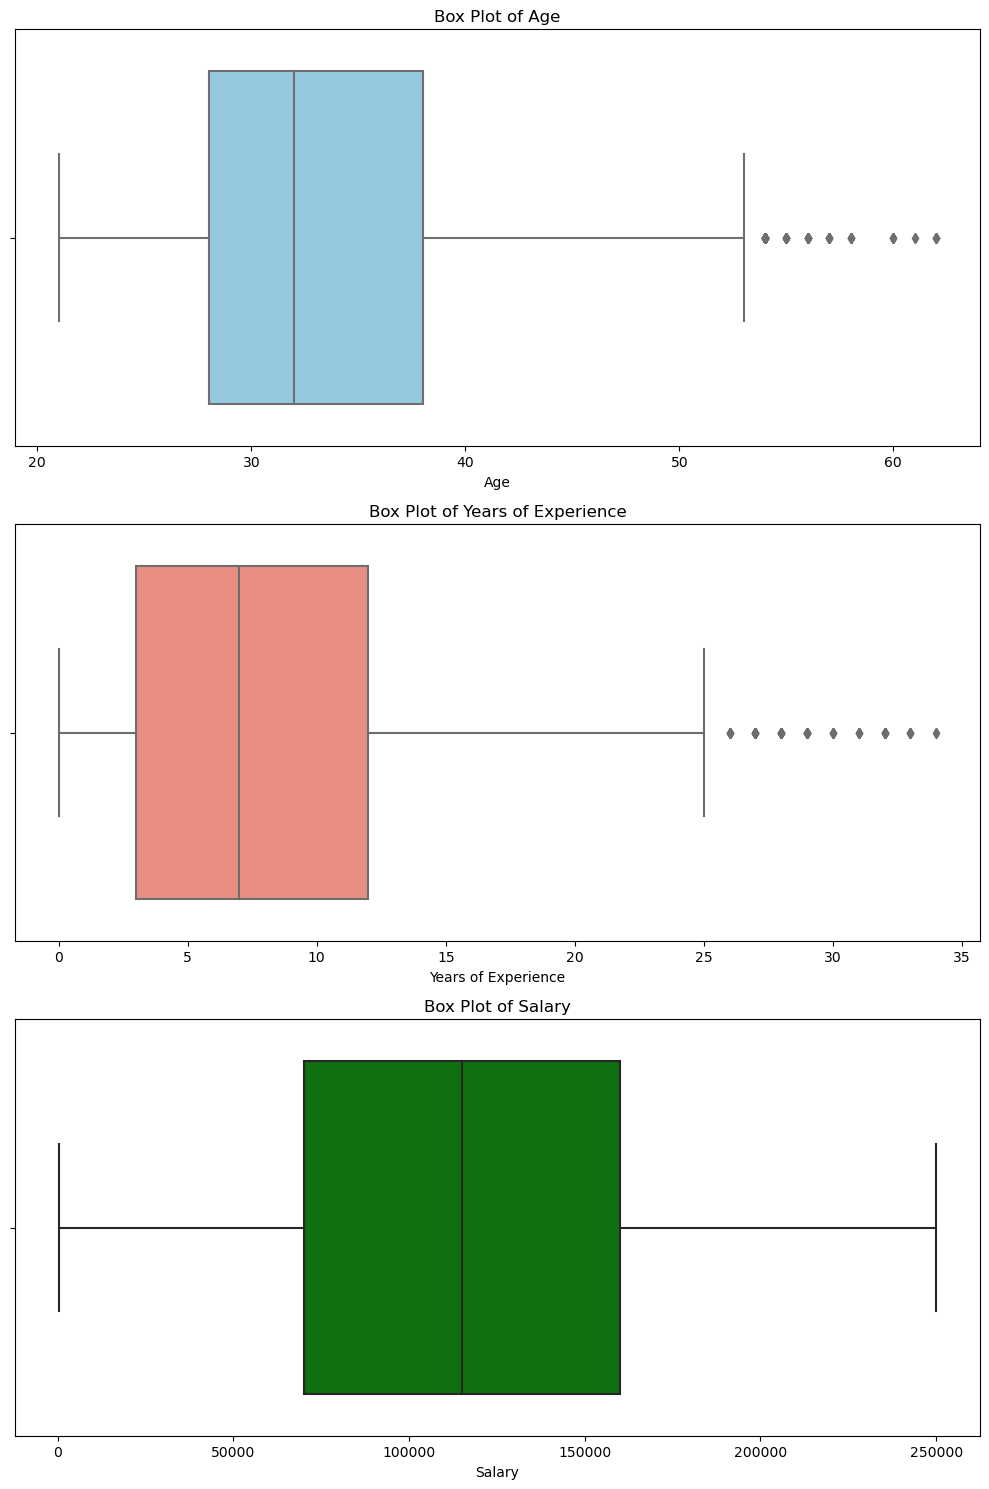

In [24]:
# Gráficos de caixa para Idade, Anos de Experiência e Salário
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.boxplot(x=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(x=df['Years of Experience'], ax=axes[1], color='salmon')
axes[1].set_title('Box Plot of Years of Experience')

sns.boxplot(x=df['Salary'], ax=axes[2], color='green')
axes[2].set_title('Box Plot of Salary')

# Ajusta o layout
plt.tight_layout()
plt.show()

In [25]:
# Selecionando apenas as colunas numéricas, excluindo a coluna 'Salary'
numeric_columns_salary = df.select_dtypes(include=[np.number]).columns.drop('Salary')

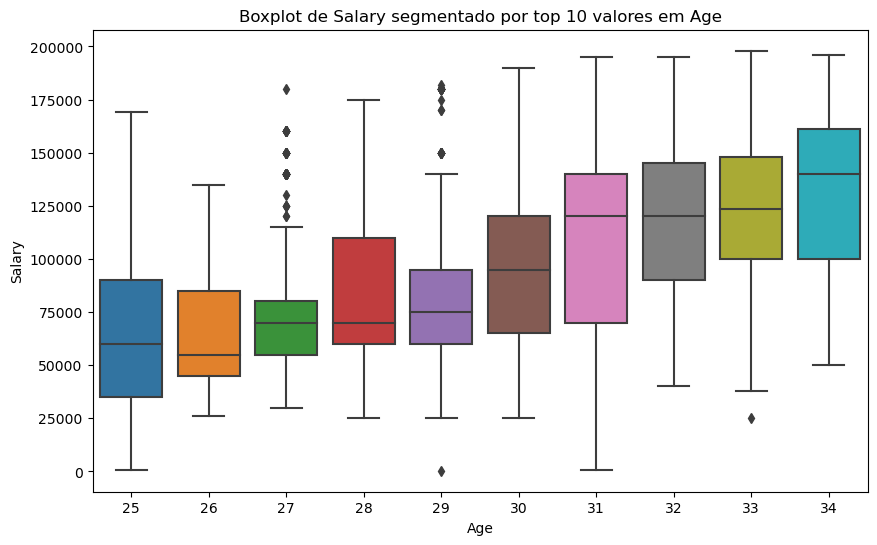

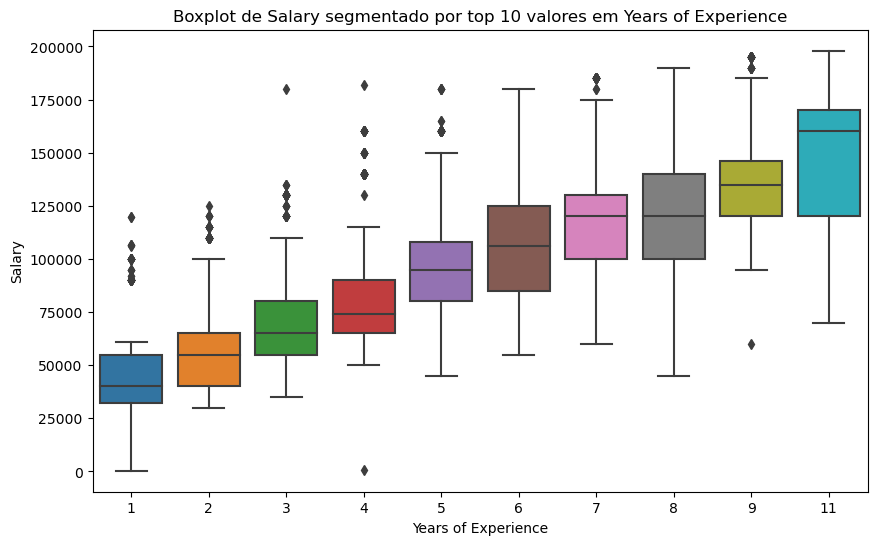

In [26]:
for col in numeric_columns_salary:
    # Selecionando os top 10 valores
    top_10_values = df[col].value_counts().index[:10]

    # Criando um novo DataFrame com apenas os top 10 valores
    df_top_10 = df[df[col].isin(top_10_values)]

    # Criando o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Salary', data=df_top_10)
    plt.title(f'Boxplot de Salary segmentado por top 10 valores em {col}')
    plt.show()

###Verificando apenas as colunas textuais

In [27]:
# Selecionando apenas as colunas textuais
text_columns = df.select_dtypes(include=[np.object]).columns

# Percorrendo cada coluna textual do DataFrame
for col in text_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:10])
    print('\n')

    

Coluna: Gender
Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64


Coluna: Education Level
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: Education Level, dtype: int64


Coluna: Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          308
Marketing Manager            255
Back end Developer           244
Senior Software Engineer     244
Name: Job Title, dtype: int64




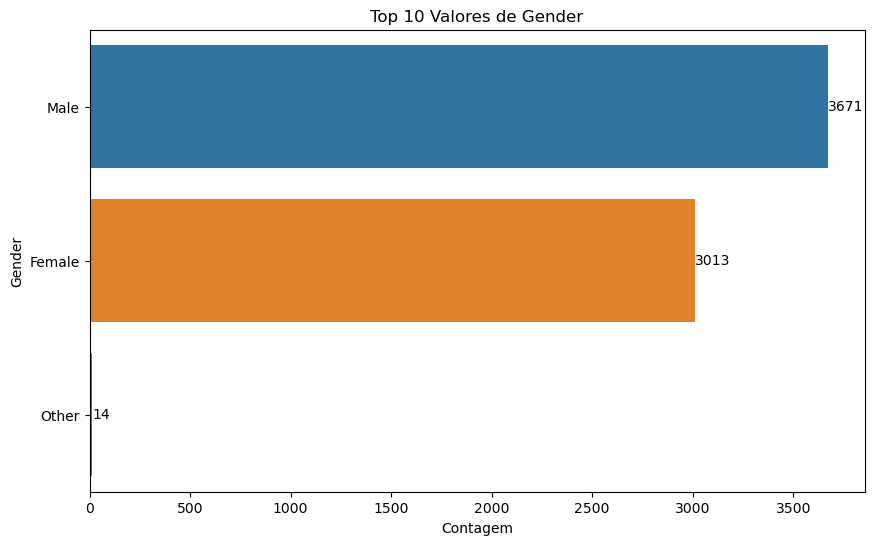

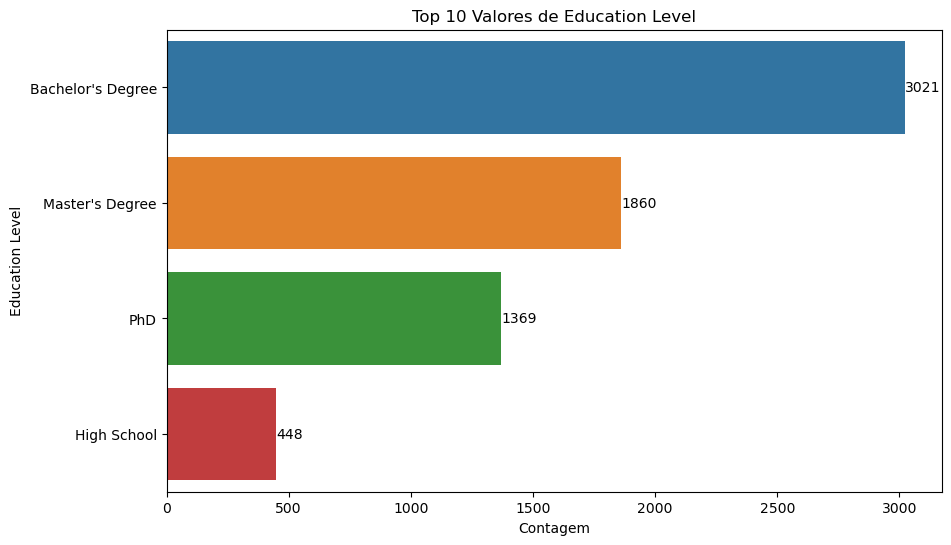

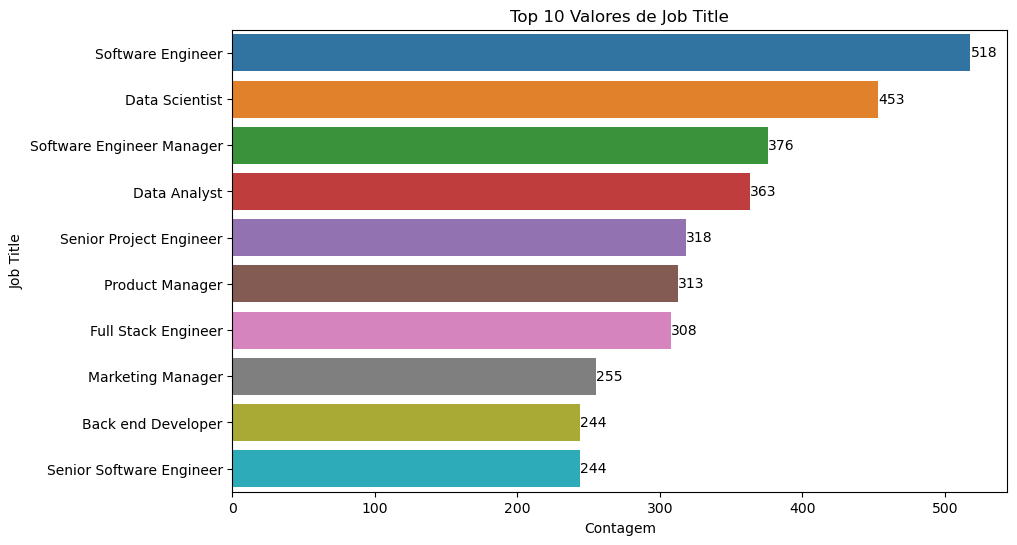

In [28]:
for coluna in text_columns:
    top_10_valores = df[coluna].value_counts().nlargest(10)
    top_10_valores_sorted = top_10_valores.sort_values(ascending=False)  # Ordena os valores em ordem decrescente
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10_valores_sorted.values, y=top_10_valores_sorted.index)
    plt.xlabel('Contagem')
    plt.ylabel(coluna)
    plt.title(f'Top 10 Valores de {coluna}')

    # Adiciona rótulos de dados
    for i, valor in enumerate(top_10_valores_sorted.values):
        plt.text(valor, i, str(valor), ha='left', va='center')

    plt.show()

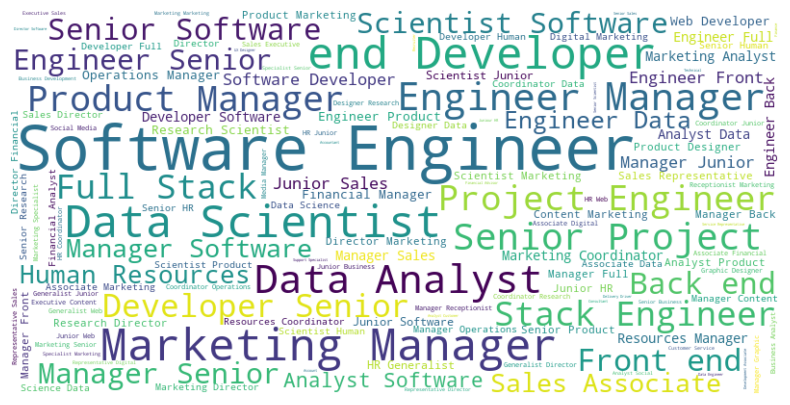

In [29]:
# Combine todo o texto da coluna 'text_column'
all_text = ' '.join(df['Job Title'])

# Crie um objeto WordCloud com alinhamento horizontal
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_text)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

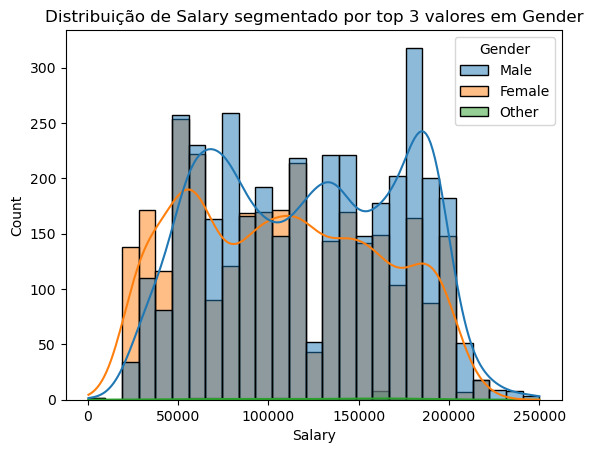

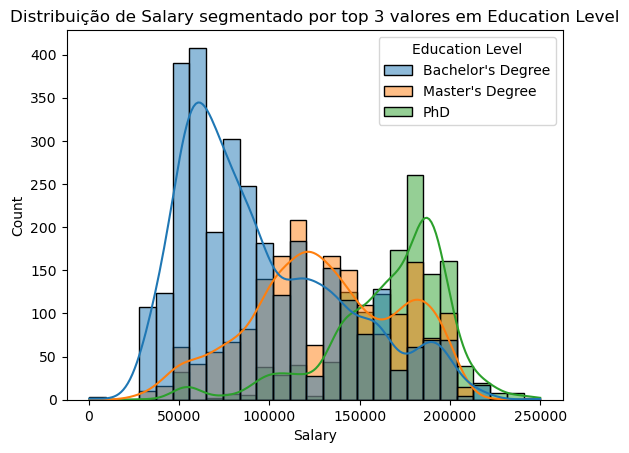

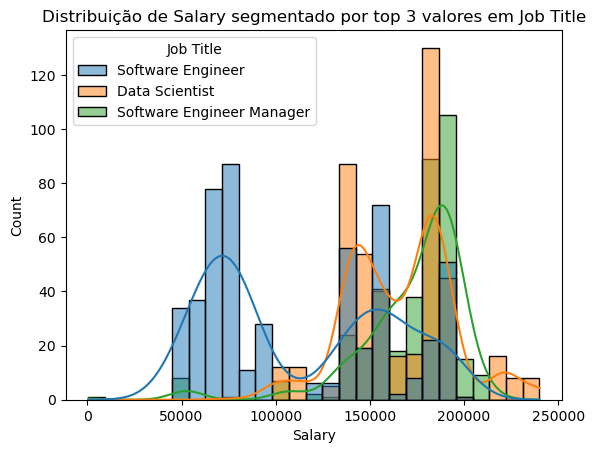

In [30]:
for col in text_columns:
    # Selecionando os top 3 valores
    top_3_values = df[col].value_counts().index[:3]

    # Filtrando o DataFrame original para incluir apenas as linhas que correspondem aos 3 principais valores
    df_top_3 = df[df[col].isin(top_3_values)]

    # Criando o gráfico de densidade de kernel
    sns.histplot(data=df_top_3, x="Salary", hue=col, kde=True)
    plt.title(f'Distribuição de Salary segmentado por top 3 valores em {col}')
    plt.show()




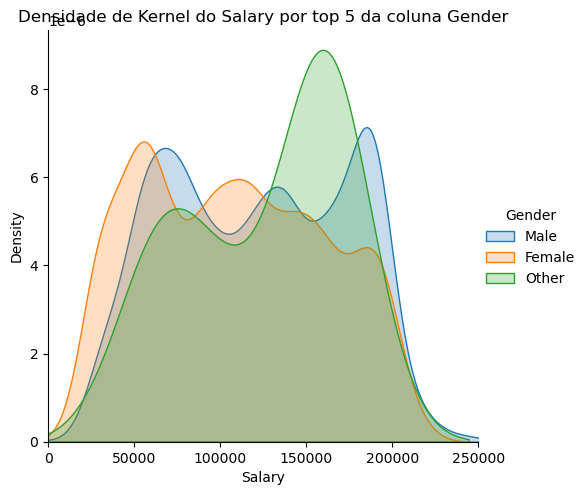

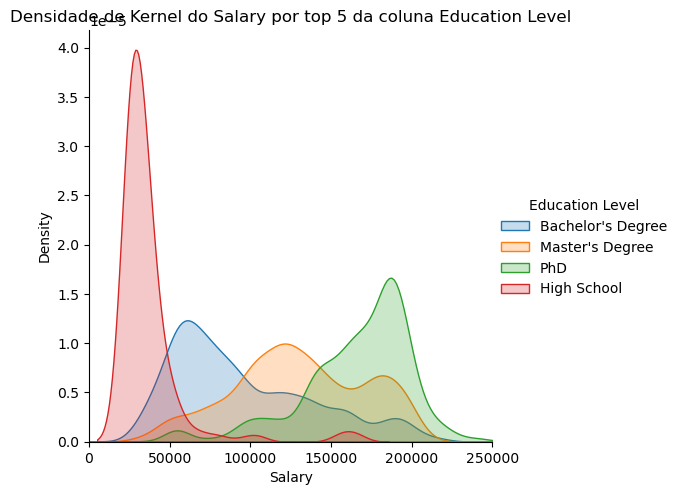

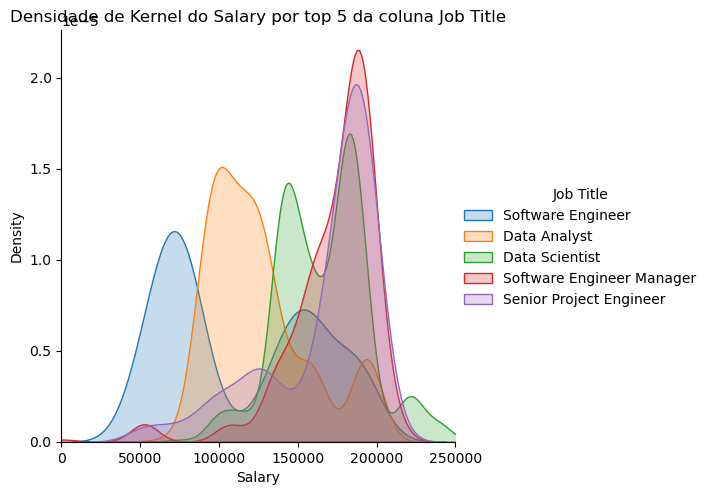

In [31]:
for col in text_columns:
    top_5_values = df[col].value_counts().index[:5]
    top_5_valores = df[df[col].isin(top_5_values)]
    g = (sns.FacetGrid(top_5_valores, hue=col, height=5, xlim=(0, 250000))
         .map(sns.kdeplot, "Salary", fill=True)
         .add_legend()
         .set(title=f"Densidade de Kernel do Salary por top 5 da coluna {col}"))
    plt.show()

###Verificando a relação entre as colunas 

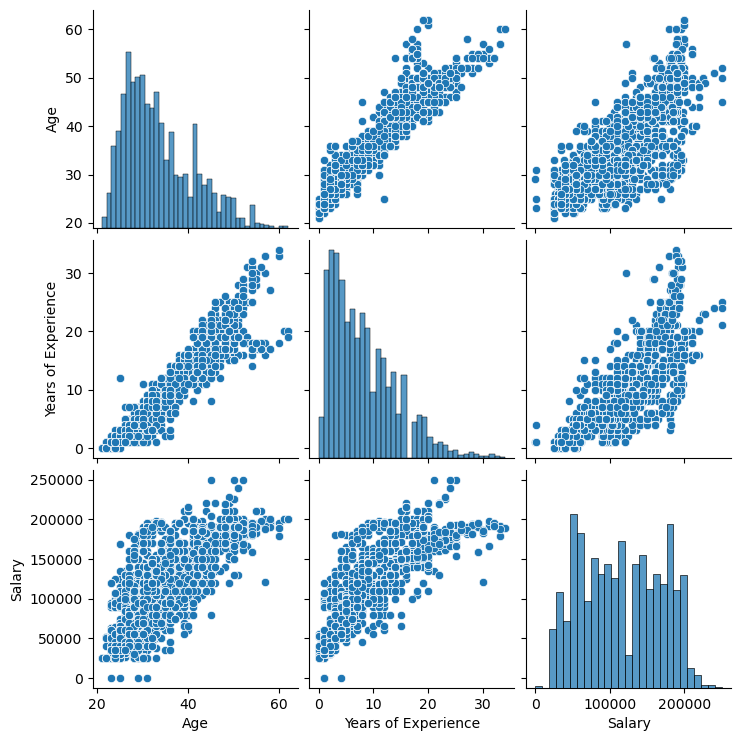

In [32]:
sns.pairplot(df);

In [33]:
#Correlação
df[['Age', 'Years of Experience','Salary']].corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937683,0.728061
Years of Experience,0.937683,1.000000,0.809060
Salary,0.728061,0.809060,1.000000


<AxesSubplot:>

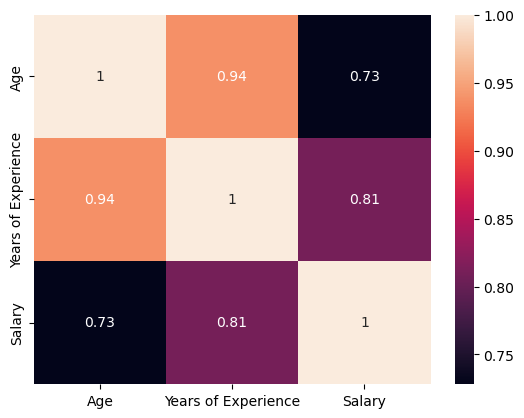

In [34]:
#Em forma gráfica
sns.heatmap(df.corr(), annot=True)

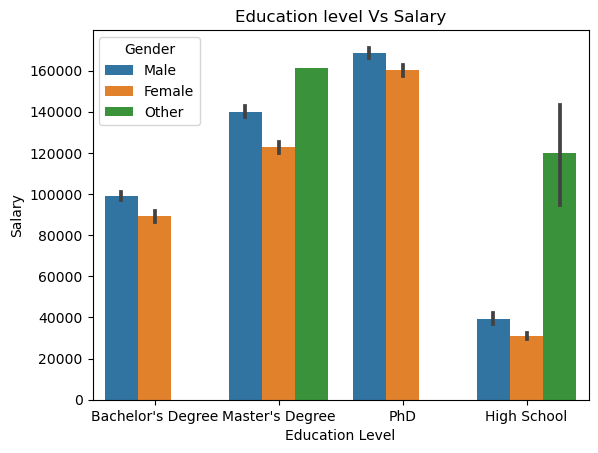

In [35]:
sns.barplot(x='Education Level',y='Salary', data=df , hue='Gender')
plt.title('Education level Vs Salary');

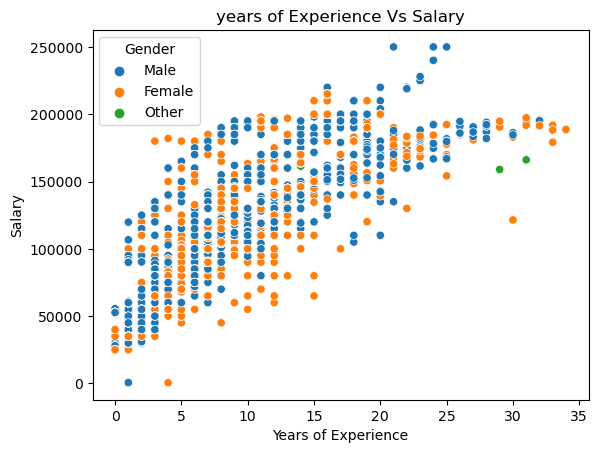

In [36]:
sns.scatterplot(x='Years of Experience',y='Salary', data=df , hue='Gender')
plt.title ("years of Experience Vs Salary");

In [37]:
max_salary=df.groupby('Job Title')[['Salary']].max().reset_index() \
.sort_values('Salary',ascending=False) \
.head(10)

min_salary=df.groupby('Job Title')[['Salary']].min().reset_index() \
.sort_values('Salary') \
.head(10)

In [38]:
min_salary

,Job Title,Salary
60,Junior Business Operations Analyst,350
69,Junior HR Coordinator,500
43,Front end Developer,550
176,Software Engineer Manager,579
83,Junior Sales Representative,25000
82,Junior Sales Associate,25000
115,Sales Associate,25000
111,Receptionist,25000
21,Delivery Driver,28000
120,Sales Representative,30000


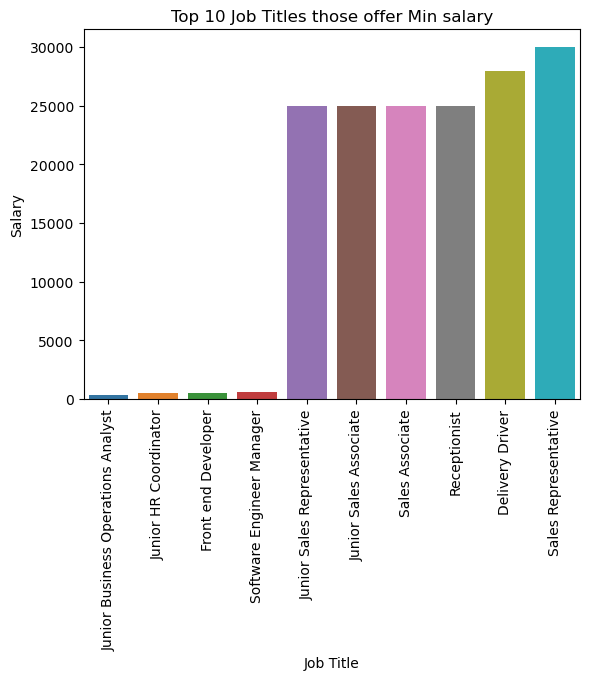

In [39]:
sns.barplot(x ='Job Title', y='Salary', data=min_salary)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer Min salary')
plt.show()

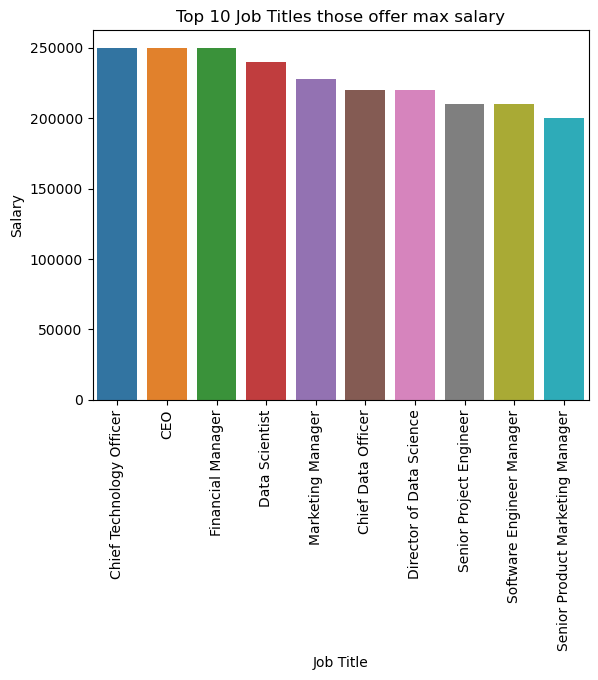

In [40]:
sns.barplot(x ='Job Title', y='Salary', data=max_salary )
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer max salary')
plt.show()

<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

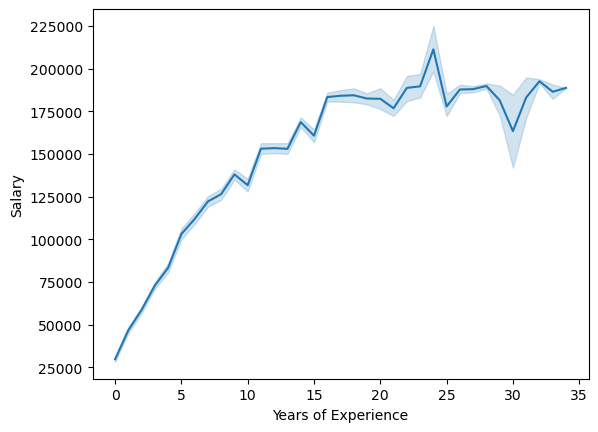

In [41]:
sns.lineplot(data = df,x = "Years of Experience",y = "Salary")

In [42]:
gender_S_mean= df.groupby('Gender')[['Salary']].mean()
gender_E_mean = df.groupby('Gender')[['Years of Experience']].mean()
gender_E_S = pd.concat ([gender_S_mean,gender_E_mean],axis=1)
gender_E_S.columns=['Mean Salary', 'Mean years of Exp']


print(gender_E_S)

          Mean Salary  Mean years of Exp
Gender                                  
Female  107888.998672           7.418852
Male    121395.697630           8.616726
Other   125869.857143          16.428571


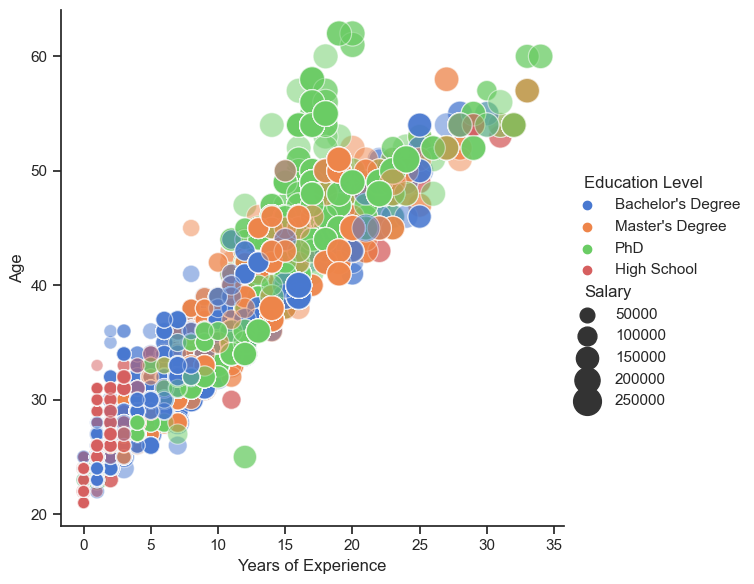

In [43]:
sns.set_theme(style="ticks")

sns.set_palette("muted")

sns.relplot(x='Years of Experience', y='Age', hue='Education Level', size="Salary",
            sizes=(40, 400), alpha=.5,
            height=6, data=df)